## 1. 투표기반 분류기

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [28]:
X, y = make_moons(n_samples = 500, noise=0.3, random_state=42)

In [29]:
X.shape, y.shape

((500, 2), (500,))

Text(0, 0.5, 'X2')

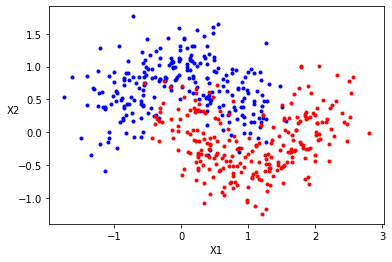

In [30]:
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'b.') # 정답이 0인 경우 blue
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r.') # 정답이 1인 경우 red
plt.xlabel('X1')
plt.ylabel('X2', rotation=0)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 1.1 하드보팅

In [46]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
                estimators=[('lr', log_clf), ('rf', rnd_clf), ('svm', svm_clf)],
                voting='hard'    
)

In [47]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


### 1.2 소프트보팅

In [48]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
                estimators=[('lr', log_clf), ('rf', rnd_clf), ('svm', svm_clf)],
                voting='soft'    
)

In [49]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


## 2. 배깅 앙상블

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [56]:
bag_clf = BaggingClassifier(
            DecisionTreeClassifier(random_state=42), n_estimators=500,
            max_samples=100, bootstrap=True, random_state=42, n_jobs=-1
          )
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=42)

In [57]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

In [53]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.856

### oob 평가

In [58]:
bag_clf = BaggingClassifier(
            DecisionTreeClassifier(random_state=42), n_estimators=500,
            max_samples=100, bootstrap=True, oob_score=True, random_state=42, n_jobs=-1
          )
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [59]:
bag_clf.oob_score_

0.9253333333333333

In [60]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

### 랜덤포레스트 모델

In [63]:
bag_clf = BaggingClassifier(
            DecisionTreeClassifier(max_leaf_nodes=16, random_state=42), n_estimators=500,
            bootstrap=True, oob_score=True, random_state=42, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [65]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [66]:
rnd_clf.feature_importances_ # x2 특성이 57%로 더 중요

array([0.42253629, 0.57746371])